In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pwd

'C:\\Users\\alejo\\UCEMA\\poo_teorica\\poo_ejercicios\\tp_final'

# <u>Navegación Web - Amplitude <u/>

Link al dataset: `navegacion_web.pq`  [link](https://www.dropbox.com/s/u39wjhai7fnnxnq/navegacion_web.pq?dl=0)

El dataset consiste en 214160 sesiones (el usuario entra a la pagina y realiza al menos una acción) en una página web de compra de automóbiles. Cada sesión lleva asociada un id de usuario y de dispositivo, el tipo de dispositivo, la fecha en que se produjo, la region y ciudad, todas las acciones que se realizaron en la sesión, y finalmente si el usuario reservó o no un auto en esa sesión.

<u> Columnas del dataset</u>
- **user_id**: id de usuario
- **device_id**: id del dispositivo
- **session_id**: id de la sesión, la sesión se activa con la entrada al sitio web
- **device_model**: modelo del dispositivo con el que se accedio al sitio
- **min_session_time**: Fecha de comienzo de la sesion
- **total_previous_sessions**: Total de sesiones previas == columna a eliminar porque se toma otra como verdadera
- **total_previous_events**: Total de eventos previos (evento: un suceso dentro del sitio -reproduccion de un video, vista de un pd, agregar un pd al carrito-)
- **date_short**: Fecha == columna a eliminar porque se desconoce el significado de la fecha
- **total_previous_vipphoto_selected**: Cantidad total de veces que se seleccionó foto en la sesion
- **total_previous_vip360view_selected**: Cantidad total de veces que se seleccionó vista 360 en la sesion
- **total_previous_catalogfilter_selected**: Cantidad total de veces que se seleccionó el filtro de catalogo en la sesion
- **total_previous_vip_viewed**: Cantidad total de veces que se vio el vip en la sesion
- **total_previous_cataloglist_viewed**: Cantidad total de veces que se vio la lista del catalogo en la sesion
- **total_previous_home_viewed**: Cantidad total de veces que se vio la home page en la sesion
- **total_previous_year_selected**: Cantidad total de veces que se seleccionó año del vehiculo en la sesion
- **total_previous_make_selected**: Cantidad total de veces que se seleccionó marca del vehiculo en la sesion
- **total_previous_model_selected**: Cantidad total de veces que se seleccionó modelo del vehiculo en la sesion
- **total_previous_version_selected**:Cantidad total de veces que se seleccionó version del vehiculo en la sesion
- **total_previous_mileage_selected**: Cantidad total de veces que se seleccionó kilometraje del vehiculo en la sesion
- **total_previous_location_selected**: Cantidad total de veces que se seleccionó ubicación en la sesion
- **total_previous_color_selected**: Cantidad total de veces que se seleccionó color del vehiculo en la sesion
- **city**: Ciudad
- **region**: Region
- **time_on_screen_prev**: tiempo en pantalla acumulado, es la multiplicacion entre total_sessions_prev y avg_time_previous_session
- **min_total_sessions_prev**: Sesiones previas == columna a eliminar porque se asume otra como verdadera
- **all_total_sessions_prev**: total de sesiones previas == columna a eliminar porque se asume otra como verdadera
- **total_sessions_prev**: Sesiones previas del usuario
- **stock_id**: Id del auto que se reservó == columna a eliminar porque no se utiliza en el analisis
- **date**: Fecha, tiene los mismos nulos que en stock_id por lo que asumimos que está relacionada a esta columna == columna a eliminar porque no se utiliza en el analisis
- **user_with_reserve**: Es igual a reserved == eliminar porque repite información
- **reserved**: Representa si el usuario realizo una reserva de auto en esa sesion, esta columna marca la conversion
- **avg_time_previous_session**: Tiempo promedio en pantalla en sesiones previas, resulta del calculo de time_on_screen / total_sessions_prev



Algunas columnas repiten información, y otras no se termina de entender el significado ya que este dataset es un recorte de un dataset más grande, por ende se van a eliminar esas columnas.

En este trabajo se busca ver si hay una relación y realizar un modelo para predecir si en una sesión se va a reservar un auto o no.
Esto podría permitir hacer foco en llevar al usuario a realizar ciertos comportamientos en la navegación web para llevarlo a reservar.

La variable objetivo es **reserved** (variable dependiente), y el resto de las variables seran utilizadas para predecir (variables independientes). Sin embargo, no todas las variables serán tomadas en cuenta ya que se utilizarán solamente aquellas de mayor importancia.

**Apertura del dataset**

Usamos read parquet para la lectura del archivo

In [2]:
df= pd.read_parquet('data/navegacion_web.pq', engine='pyarrow')
data = df.copy()

In [3]:
data.head()

,user_id,device_id,session_id,device_model,min_session_time,total_previous_sessions,total_previous_events,date_short,total_previous_vipphoto_selected,total_previous_vip360view_selected,...,region,time_on_screen_prev,min_total_sessions_prev,all_total_sessions_prev,total_sessions_prev,stock_id,date,user_with_reserve,reserved,avg_time_previous_sessions
51760,9015447,yWOTGT6B-WzQU514Cqx1gL,1644253316189,Android,2022-02-07 17:01:56.223,1,1,2022-01-01 00:11:51.858,0,0,...,Mexico City,0.0,0,0,1,NaN,NaT,0.0,0.0,0.0
14885,8820027,LP42_fstvBPogWjh_1bkCg,1642913715699,Android,2022-01-23 04:55:17.124,1,9,2022-01-01 00:17:23.169,0,0,...,Mexico City,286.0,1,1,2,NaN,NaT,0.0,0.0,143.0
3992,5510567,AKERRpRODjl02b39AjfNb8,1642459615372,Android,2022-01-17 22:46:55.395,1,1,2022-01-01 00:22:28.720,0,0,...,Mexico City,0.0,0,0,1,NaN,NaT,0.0,0.0,0.0
131349,8665203,SxeKxvgE3mkec-e21Ej-bm,1647229337062,Android,2022-03-14 03:42:17.095,1,9,2022-01-01 00:27:00.994,0,0,...,Mexico City,379.0,1,1,2,NaN,NaT,0.0,0.0,189.5
25970,8409083,CttzrxBwYiDT93zwK93Xmt,1643398529809,Android,2022-01-28 19:35:32.308,1,1,2022-01-01 00:28:48.352,0,0,...,México,0.0,0,0,1,NaN,NaT,0.0,0.0,0.0


# <u> 1. Características del dataset<u/>

In [4]:
# Buscamos las filas y columnas del dataset
print(f'Filas: {data.shape[0]}')
print(f'Columnas: {data.shape[1]}')

Filas: 214160
Columnas: 32


In [5]:
# Tipo de dato de cada columna
data.dtypes

user_id                                           int64
device_id                                        object
session_id                                       object
device_model                                   category
min_session_time                         datetime64[ns]
total_previous_sessions                           int64
total_previous_events                             int64
date_short                               datetime64[ns]
total_previous_vipphoto_selected                  int64
total_previous_vip360view_selected                int64
total_previous_catalogfilter_selected             int64
total_previous_vip_viewed                         int64
total_previous_cataloglist_viewed                 int64
total_previous_home_viewed                        int64
total_previous_year_selected                      int64
total_previous_make_selected                      int64
total_previous_model_selected                     int64
total_previous_version_selected                 

In [6]:
# Resumen estadístico de cada columna
data[['min_session_time', 'total_previous_sessions', 'total_previous_events',
       'date_short', 'total_previous_vipphoto_selected',
       'total_previous_vip360view_selected',
       'total_previous_catalogfilter_selected', 'total_previous_vip_viewed',
       'total_previous_cataloglist_viewed', 'total_previous_home_viewed',
       'total_previous_year_selected', 'total_previous_make_selected',
       'total_previous_model_selected', 'total_previous_version_selected',
       'total_previous_mileage_selected', 'total_previous_location_selected',
       'total_previous_color_selected', 'city', 'region',
       'time_on_screen_prev', 'min_total_sessions_prev',
       'all_total_sessions_prev', 'total_sessions_prev']].describe()

,total_previous_sessions,total_previous_events,total_previous_vipphoto_selected,total_previous_vip360view_selected,total_previous_catalogfilter_selected,total_previous_vip_viewed,total_previous_cataloglist_viewed,total_previous_home_viewed,total_previous_year_selected,total_previous_make_selected,total_previous_model_selected,total_previous_version_selected,total_previous_mileage_selected,total_previous_location_selected,total_previous_color_selected,time_on_screen_prev,min_total_sessions_prev,all_total_sessions_prev,total_sessions_prev
count,214160.000000,214160.00000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,2.141600e+05,214160.000000,214160.000000,214160.000000
mean,6.721839,136.05466,5.022619,0.549743,28.677615,25.250299,35.365283,4.779613,0.372913,0.376718,0.339470,0.324351,0.299220,0.262229,0.247086,8.518372e+04,5.914989,5.914989,6.660035
std,15.737519,406.15579,49.460406,5.033431,122.384672,81.485442,177.395937,22.261192,1.913053,1.884517,1.705465,1.657433,1.599664,1.538530,1.416469,6.172415e+05,15.261105,15.261105,14.556284
min,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,1.000000,12.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.920000e+02,1.000000,1.000000,2.000000
50%,3.000000,36.00000,0.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.140000e+02,2.000000,2.000000,3.000000
75%,6.000000,115.00000,0.000000,0.000000,18.000000,20.000000,14.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.426000e+03,5.000000,5.000000,6.000000
max,1388.000000,39953.00000,8286.000000,694.000000,11739.000000,6743.000000,21358.000000,2546.000000,320.000000,226.000000,223.000000,223.000000,211.000000,207.000000,213.000000,1.837662e+07,1410.000000,1410.000000,1361.000000


*Outliers*
Muchas columnas tienen 0s hasta el 3 cuartil y luego maximos muy altos.
Todas las columnas _previous_, que muestran las acciones realizadas en la sesion, tienen maximos demasiado altos.
Sesiones previas tienen 3 cuartil de 5 o 6 sesiones y maximos de 1400.

Trataremos estos calores atípicos más adelante

# <u> 2. Análisis por columna<u/>

In [7]:
%load_ext autoreload
%autoreload 2

#### <u>Correlacion entre columnas<u/>

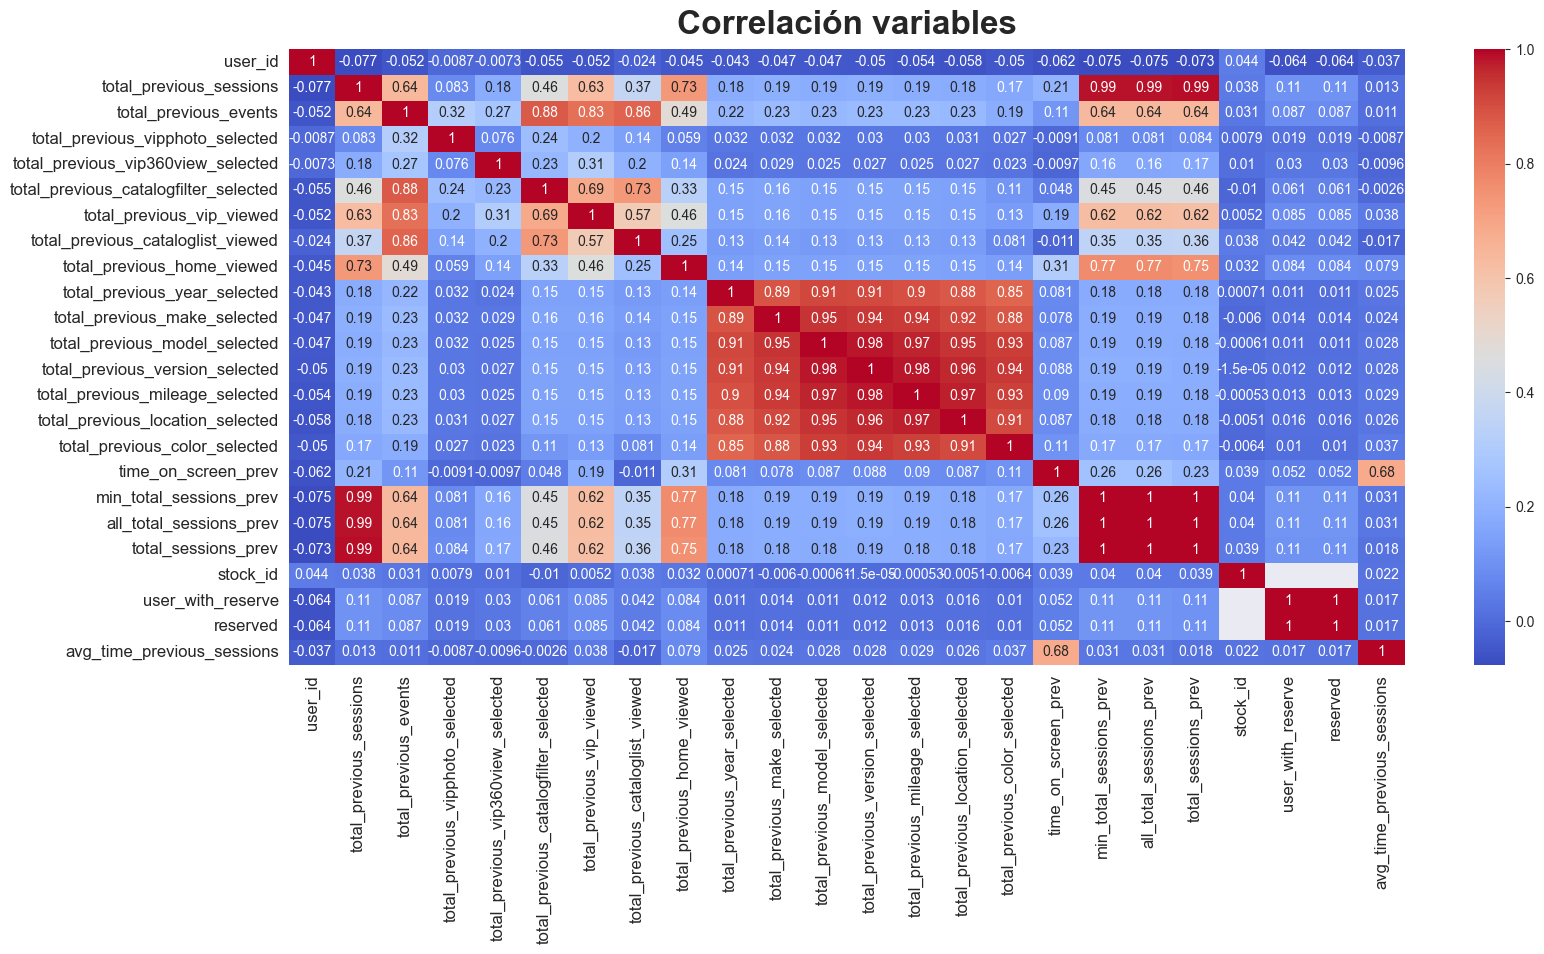

In [8]:
# ninguna columna tiene una correlación fuerte con la variable objetivo
plt.figure(figsize=(18, 8))
sns.heatmap(data.corr(),annot=True, cmap="coolwarm").set_title('Correlación variables', fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show();


#### <u>Users and Sessions<u/>

In [9]:
# No hay un usuario por cada fila
data.user_id.nunique() == len(data)

False

In [10]:
# Hay una sesion por fila
data.session_id.nunique() == len(data)

True

In [11]:
# agrupo sesiones por usuario
count_by_user = data.groupby('user_id').agg('count')['session_id'].to_frame('count_session_id')
count_by_user.sort_values(['count_session_id'],ascending=False)

,count_session_id
user_id,
4362580,84
8343164,70
8334191,59
3198949,53
5686051,49
...,...
8497762,1
8497717,1
8497691,1


In [12]:
# las sesiones se van guardando por usuario, si veo un usuario a lo largo del tiempo las sesiones deberian ir subiendo
data[data.user_id == 9162486][['user_id','total_previous_sessions', 'total_previous_events','date_short','date','min_session_time','time_on_screen_prev', 'min_total_sessions_prev','all_total_sessions_prev', 'total_sessions_prev','avg_time_previous_sessions' ]].sort_values(['min_session_time'],ascending=True)

,user_id,total_previous_sessions,total_previous_events,date_short,date,min_session_time,time_on_screen_prev,min_total_sessions_prev,all_total_sessions_prev,total_sessions_prev,avg_time_previous_sessions
84471,9162486,1,10,2022-02-19 01:25:24.119,NaT,2022-02-19 02:38:54.625,252.0,1,1,2,126.000000
85522,9162486,4,137,2022-02-19 09:28:48.131,NaT,2022-02-19 16:56:13.562,2892.0,4,4,5,578.400000
85700,9162486,6,203,2022-02-19 17:24:16.131,NaT,2022-02-19 18:14:14.854,4583.0,6,6,7,654.714286
88606,9162486,10,203,2022-02-20 18:28:33.755,NaT,2022-02-20 21:01:23.996,2381.0,5,5,6,396.833333
88636,9162486,11,217,2022-02-20 21:04:54.520,NaT,2022-02-20 21:12:00.794,2592.0,6,6,7,370.285714
89371,9162486,13,339,2022-02-21 02:04:39.745,NaT,2022-02-21 02:08:23.163,5205.0,8,8,9,578.333333
89581,9162486,14,375,2022-02-21 02:54:39.309,NaT,2022-02-21 03:25:31.259,7981.0,9,9,10,798.100000
89620,9162486,15,410,2022-02-21 03:40:04.260,NaT,2022-02-21 03:40:10.592,8854.0,10,10,11,804.909091
90592,9162486,18,508,2022-02-21 15:11:29.372,NaT,2022-02-21 17:01:22.747,10429.0,12,12,13,802.230769
91167,9162486,20,525,2022-02-21 18:12:44.450,NaT,2022-02-21 21:22:03.483,10503.0,14,14,15,700.200000


#### <u>Previous Sessions<u/>

In [13]:
# Comparo las 4 columnas que muestran sesiones previas, finalmente me quedo con total_previous_sessions
(data.min_total_sessions_prev == data.all_total_sessions_prev).value_counts()

True    214160
dtype: int64

In [14]:
(data.all_total_sessions_prev == data.total_sessions_prev).value_counts()

False    199191
True      14969
dtype: int64

In [15]:
(data.all_total_sessions_prev == data.total_previous_sessions).value_counts()

True     109242
False    104918
dtype: int64

In [16]:
((data.all_total_sessions_prev + data.total_previous_sessions) == data.total_sessions_prev).value_counts()

False    149652
True      64508
dtype: int64

Vamos a utilizar la columna total_sessions_prev para medir las sesiones previas

#### <u>Previous events<u/>

In [17]:
data.total_previous_events.value_counts()

2       10247
4        8089
1        5242
6        5133
8        4969
        ...  
3739        1
5057        1
2220        1
2935        1
5881        1
Name: total_previous_events, Length: 2868, dtype: int64

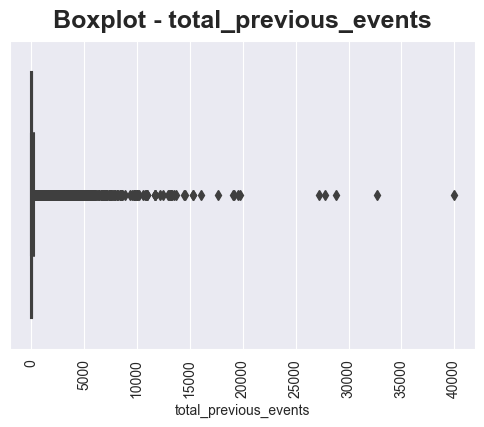

In [18]:
# vamos a tratar los outliers mas adelante
from visualization import boxplot
boxplot(data, 'total_previous_events')

#### <u>Date columns<u/>

In [19]:
data[data.user_id == 4362580][['user_id','min_session_time','date_short','time_on_screen_prev']].sort_values(['date_short'],ascending=True)


,user_id,min_session_time,date_short,time_on_screen_prev
6888,4362580,2022-01-19 18:05:50.967,2022-01-19 06:34:43.900,6344.0
7083,4362580,2022-01-19 19:23:29.396,2022-01-19 18:51:27.260,185.0
7608,4362580,2022-01-19 23:07:02.437,2022-01-19 19:29:16.334,532.0
7591,4362580,2022-01-19 23:02:46.657,2022-01-19 21:40:44.149,7708.0
10037,4362580,2022-01-21 00:44:20.259,2022-01-19 23:08:58.022,648.0
...,...,...,...,...
137186,4362580,2022-03-17 02:05:33.596,2022-03-14 06:31:36.484,252.0
165341,4362580,2022-04-01 07:17:14.402,2022-03-21 00:10:49.335,3491.0
156140,4362580,2022-03-27 16:52:22.203,2022-03-25 06:38:27.349,24.0
171960,4362580,2022-04-05 18:37:49.910,2022-04-05 17:33:45.246,4231.0


min_session_time es la fecha de inicio de la sesion, vamos a quedarnos solo con esa columna

In [20]:
# divido la columna de fecha para observar horas, dias y meses
data['session_hour_of_day'] = data.min_session_time.dt.hour
data['session_day_of_month'] = data.min_session_time.dt.day
data['session_month'] = data.min_session_time.dt.month

In [21]:
# esta funcion la encontré en stack overflow: https://stackoverflow.com/questions/25249033/week-of-a-month-pandas
import pandas as pd
import math

data['session_week_of_month'] = pd.to_numeric(data.min_session_time.dt.day/7)
data['session_week_of_month'] = data['session_week_of_month'].apply(lambda x: math.ceil(x))
data['session_week_of_month']

51760     1
14885     4
3992      3
131349    2
25970     4
         ..
214144    5
214111    5
214150    5
214142    5
214156    5
Name: session_week_of_month, Length: 214160, dtype: int64

In [22]:
date_time_cols = ['session_hour_of_day','session_day_of_month','session_week_of_month','session_month']
data[date_time_cols].describe()

,session_hour_of_day,session_day_of_month,session_week_of_month,session_month
count,214160.000000,214160.000000,214160.000000,214160.000000
mean,12.417099,16.386230,2.795639,2.583293
std,7.918700,8.661248,1.242365,1.011563
min,0.000000,1.000000,1.000000,1.000000
25%,4.000000,9.000000,2.000000,2.000000
50%,15.000000,17.000000,3.000000,3.000000
75%,19.000000,24.000000,4.000000,3.000000
max,23.000000,31.000000,5.000000,4.000000


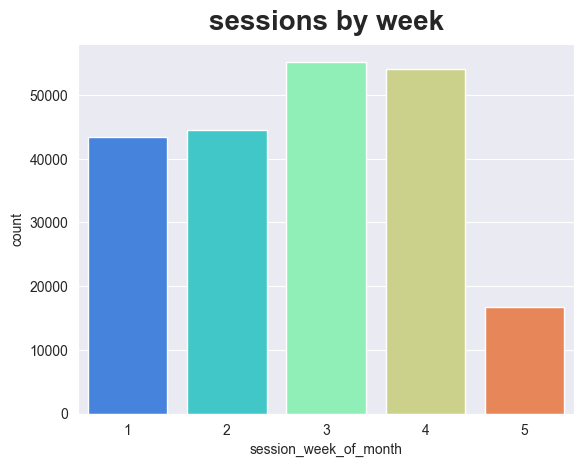

In [23]:
g = sns.countplot(data=data, x='session_week_of_month', palette="rainbow");
g.set_title('sessions by week', fontdict={'fontsize': 20, 'verticalalignment': 'bottom'}, weight='bold')
sns.set(rc={"figure.figsize": (8, 5)})

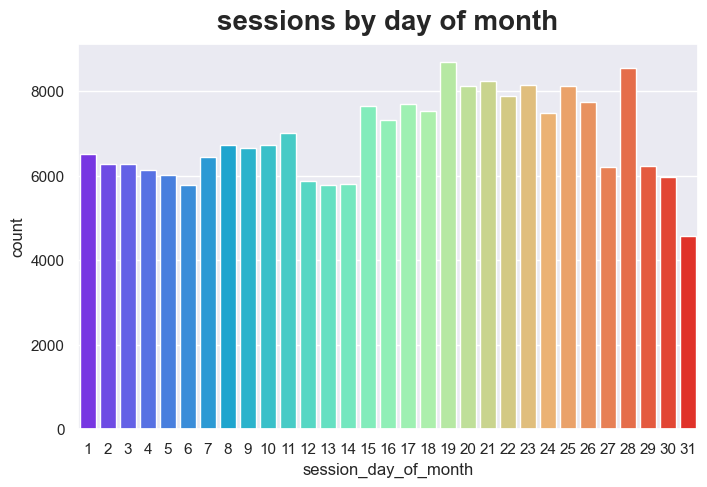

In [24]:
g = sns.countplot(data=data, x='session_day_of_month', palette="rainbow");
g.set_title('sessions by day of month', fontdict={'fontsize': 20, 'verticalalignment': 'bottom'}, weight='bold')
sns.set(rc={"figure.figsize": (8, 5)})

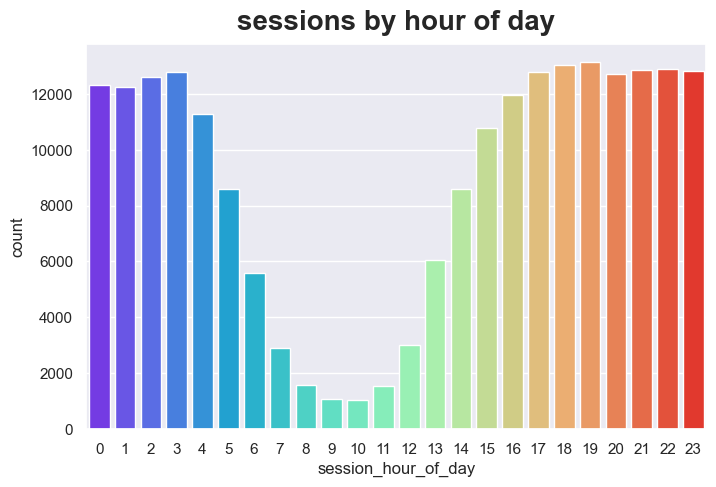

In [25]:
g = sns.countplot(data=data, x='session_hour_of_day', palette="rainbow");
g.set_title('sessions by hour of day', fontdict={'fontsize': 20, 'verticalalignment': 'bottom'}, weight='bold')
sns.set(rc={"figure.figsize": (8, 5)})

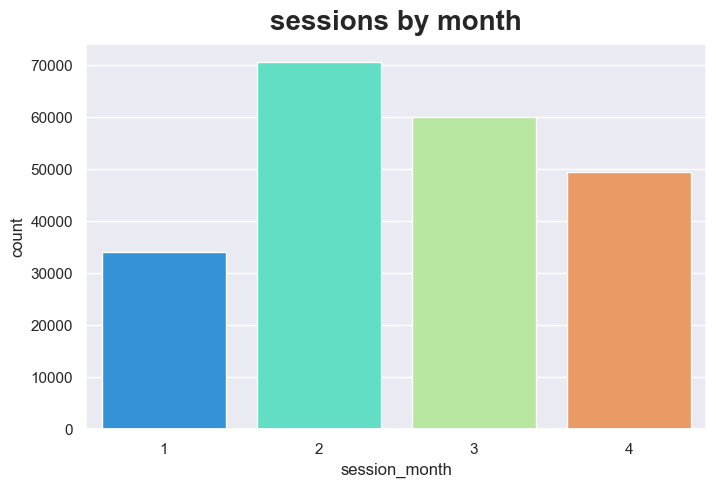

In [26]:
g = sns.countplot(data=data, x='session_month', palette="rainbow");
g.set_title('sessions by month', fontdict={'fontsize': 20, 'verticalalignment': 'bottom'}, weight='bold')
sns.set(rc={"figure.figsize": (8, 5)})

#### <u>City and Region<u/>

In [27]:
count_by_region = data.groupby('city').agg('count')['session_id'].to_frame('count_session_id')
count_by_region.sort_values(['count_session_id'],ascending=False)

,count_session_id
city,
Mexico City,56225
Guadalajara,12950
Puebla City,8041
Monterrey,7230
Toluca,6019
...,...
Carmen Primera Seccion,0
Manzanastitla,0
Cotaxtla,0


In [28]:
# gran concentracion de los registros en ciudad de mex
count_by_region = data.groupby('region').agg('count')['session_id'].to_frame('count_session_id')
count_by_region.sort_values(['count_session_id'],ascending=False)

,count_session_id
region,
Mexico City,94032
México,33481
Jalisco,23953
Nuevo León,15623
Puebla,10364
Querétaro,8517
Guanajuato,2825
Veracruz,2500
Morelos,2362


In [29]:
# reemplazo en region México por Mexico City, asumo que Mexico refiere a ciudad de mexico
data.region.replace('México', 'Mexico City', inplace=True)

In [30]:
# reemplazo en region nan por None
data.region.replace('nan', 'None', inplace=True)

In [31]:
count_by_region = data.groupby('region').agg('count')['session_id'].to_frame('count_session_id')
count_by_region.sort_values(['count_session_id'],ascending=False)

,count_session_id
region,
Mexico City,127513
Jalisco,23953
Nuevo León,15623
Puebla,10364
Querétaro,8517
None,3655
Guanajuato,2825
Veracruz,2500
Morelos,2362


In [32]:
pivot_region = pd.crosstab(data['region'],data['reserved'])
pivot_region.sort_values([1.0],ascending=False)

reserved,0.0,1.0
region,,
Mexico City,116013,11500
Jalisco,21770,2183
Nuevo León,14441,1182
Puebla,9553,811
Querétaro,7717,800
Morelos,2158,204
Guanajuato,2630,195
Chihuahua,1655,153
None,3507,148


#### <u>Devices<u/>

In [33]:
# gran mayoria de usuarios que navegan usando dispositivos android
data.device_model.value_counts()

Android           127440
iPhone             32580
Windows            29646
Mac                 6428
STK-LX3              610
                   ...  
SM-P580                0
COVET_PRO_LITE         0
M2006C3LI              0
CPH2009                0
iPhone14,6             0
Name: device_model, Length: 776, dtype: int64

In [34]:
# encontré diferentes nombres que refieren a un mismo tipo de dispositivo, voy a intentar homogeneizar estas categorias para poder sacar más provecho de esta columna
data['device_model'] = data.device_model.apply(lambda x: 'iPhone' if 'iP' in x \
    else 'Motorola' if 'moto' in x \
    else 'Motorola' if 'Moto' in x \
    else 'SM' if 'SM' in x \
    else 'Redmi' if 'Redmi' in x \
    else x)
data.device_model.value_counts()

Android       127440
iPhone         35699
Windows        29646
Mac             6428
SM              4969
               ...  
BLADE A530         1
PEEM00             1
RMX3263            1
REVVL 2            1
Nubia 6010         1
Name: device_model, Length: 415, dtype: int64

In [35]:
# hay muchos tipos de dispositivos que no es claro el nombre e incluso que solo aparecen en 1 registro, voy a agregar estos casos a una lista para luego juntar todos estos dispositivos en una categoría "others"
less_repeated_devices = []
for val, cnt in data.device_model.value_counts().iteritems():
    if cnt < 1000:
        less_repeated_devices.append(val)

In [36]:
data['device_model'] = data.device_model.apply(lambda x: 'Others' if x in less_repeated_devices \
    else x)
data.device_model.value_counts()

Android     127440
iPhone       35699
Windows      29646
Others        7319
Mac           6428
SM            4969
Motorola      2659
Name: device_model, dtype: int64

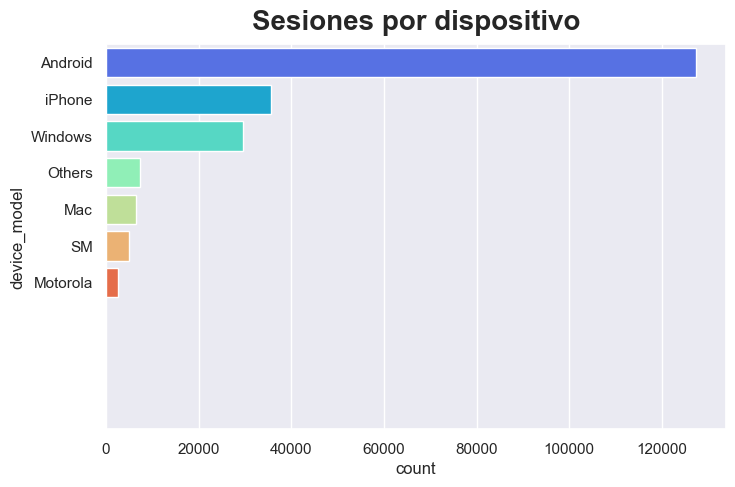

In [37]:
from visualization import countplot
countplot(data,'device_model','Sesiones por dispositivo')

#### <u>Events columns<u/>

In [38]:
events_cols = ['total_previous_vipphoto_selected',
       'total_previous_vip360view_selected',
       'total_previous_catalogfilter_selected', 'total_previous_vip_viewed',
       'total_previous_cataloglist_viewed', 'total_previous_home_viewed',
       'total_previous_year_selected', 'total_previous_make_selected',
       'total_previous_model_selected', 'total_previous_version_selected',
       'total_previous_mileage_selected', 'total_previous_location_selected',
       'total_previous_color_selected']


In [39]:
# todas tienen maximos muy altos, son outliers y tenemos que estandarizar
data[events_cols].describe()

,total_previous_vipphoto_selected,total_previous_vip360view_selected,total_previous_catalogfilter_selected,total_previous_vip_viewed,total_previous_cataloglist_viewed,total_previous_home_viewed,total_previous_year_selected,total_previous_make_selected,total_previous_model_selected,total_previous_version_selected,total_previous_mileage_selected,total_previous_location_selected,total_previous_color_selected
count,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000
mean,5.022619,0.549743,28.677615,25.250299,35.365283,4.779613,0.372913,0.376718,0.339470,0.324351,0.299220,0.262229,0.247086
std,49.460406,5.033431,122.384672,81.485442,177.395937,22.261192,1.913053,1.884517,1.705465,1.657433,1.599664,1.538530,1.416469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,18.000000,20.000000,14.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8286.000000,694.000000,11739.000000,6743.000000,21358.000000,2546.000000,320.000000,226.000000,223.000000,223.000000,211.000000,207.000000,213.000000


#### <u>Time on screen<u/>

In [40]:
data.groupby('reserved').agg('mean')['time_on_screen_prev'].to_frame('tiempo en pantalla promedio antes de reserva')

,tiempo en pantalla promedio antes de reserva
reserved,
0.0,75348.002250
1.0,191321.024666


<AxesSubplot:ylabel='Frequency'>

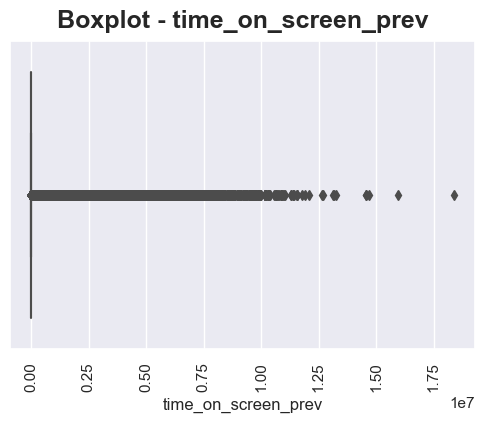

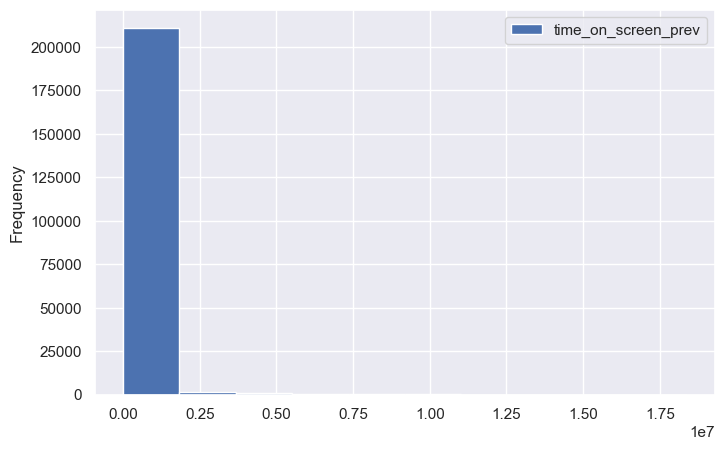

In [41]:
from visualization import boxplot

boxplot(data, 'time_on_screen_prev')
data[['time_on_screen_prev']].plot.hist(bins=10)

In [42]:
# vemos outliers, seran tratados mas adelante
screen_time_describe = data.time_on_screen_prev.describe()
screen_time_describe.round(2)

count      214160.00
mean        85183.72
std        617241.53
min             0.00
25%           192.00
50%           914.00
75%          3426.00
max      18376616.00
Name: time_on_screen_prev, dtype: float64

In [43]:
# vemos que la prorporcion de conversion es baja
print(f'El dataset tiene {data.reserved.value_counts(normalize=True).round(2)[0] *100}% de sesiones donde no se convirtio, mientras que solo {data.reserved.value_counts(normalize=True).round(2)[1]*100}% que si lo hicieron')

El dataset tiene 92.0% de sesiones donde no se convirtio, mientras que solo 8.0% que si lo hicieron


In [44]:
data.user_id.nunique()

140084

In [45]:
# Hay 8863 usuarios que reservaron y 136921 que no lo hicieron
data.groupby('reserved')['user_id'].nunique()

reserved
0.0    136921
1.0      8863
Name: user_id, dtype: int64

#### <u>Reserved<u/>

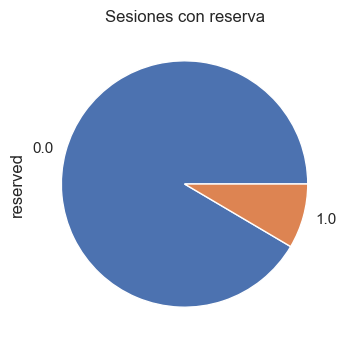

In [46]:
plt.rcParams.update({'figure.figsize':(5,4)})
data.reserved.value_counts().plot(kind ='pie', title= 'Sesiones con reserva')
plt.show()

In [47]:
# vemos la cantidad de reservas por dispositivo
mask_reserva = data.reserved == 1
group_device_reserved_user = data[mask_reserva].groupby('device_model').agg('count',)['user_id'].to_frame('cantidad de usuarios').sort_values('cantidad de usuarios', ascending=False)
group_device_reserved_user

,cantidad de usuarios
device_model,
Android,7943
iPhone,4158
Windows,3035
Others,951
SM,858
Mac,853
Motorola,365


<AxesSubplot:xlabel='device_model'>

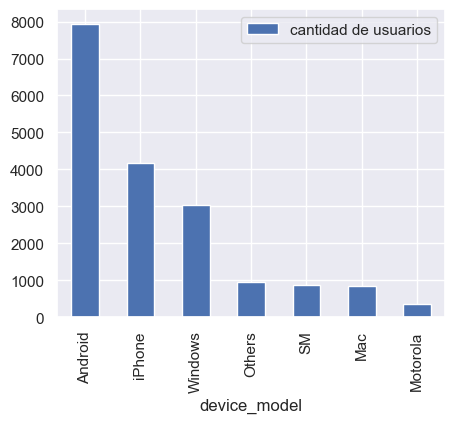

In [48]:
# plot de reservas por dispositivo
group_device_reserved_user.plot(kind='bar')

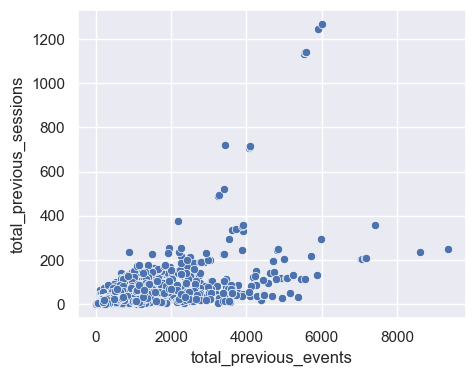

In [49]:
# relacion entre sesiones previas y eventos previos para sesiones con reserva
from visualization import scatter
scatter(data[mask_reserva], 'total_previous_events', 'total_previous_sessions')

In [50]:
# resumen estadisticas de las sesiones con reserva
data[mask_reserva].describe()

,user_id,total_previous_sessions,total_previous_events,total_previous_vipphoto_selected,total_previous_vip360view_selected,total_previous_catalogfilter_selected,total_previous_vip_viewed,total_previous_cataloglist_viewed,total_previous_home_viewed,total_previous_year_selected,...,all_total_sessions_prev,total_sessions_prev,stock_id,user_with_reserve,reserved,avg_time_previous_sessions,session_hour_of_day,session_day_of_month,session_month,session_week_of_month
count,1.816300e+04,18163.000000,18163.000000,18163.000000,18163.000000,18163.000000,18163.000000,18163.000000,18163.000000,18163.000000,...,18163.000000,18163.000000,18163.000000,18163.0,18163.0,1.816300e+04,18163.000000,18163.000000,18163.000000,18163.000000
mean,6.720752e+06,12.214282,251.599240,8.117492,1.043495,53.072840,48.133513,60.085228,10.887023,0.439520,...,11.428288,11.791444,147558.372295,1.0,1.0,1.427857e+04,13.223917,16.071079,2.476849,2.752354
std,2.682864e+06,31.041195,494.487872,48.636368,7.808317,143.324973,108.176656,189.242062,51.761461,1.602056,...,31.156407,29.826073,28065.350928,0.0,0.0,9.134340e+04,7.970738,8.616750,1.002118,1.235422
min,1.360000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,4258.000000,1.0,1.0,0.000000e+00,0.000000,1.000000,1.000000,1.000000
25%,4.522766e+06,2.000000,27.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,2.000000,3.000000,131200.000000,1.0,1.0,1.985417e+02,4.000000,9.000000,2.000000,2.000000
50%,8.240085e+06,5.000000,89.000000,0.000000,0.000000,9.000000,13.000000,0.000000,2.000000,0.000000,...,4.000000,5.000000,155340.000000,1.0,1.0,5.105000e+02,16.000000,17.000000,2.000000,3.000000
75%,9.060408e+06,12.000000,270.500000,0.000000,0.000000,46.000000,49.000000,35.000000,8.000000,0.000000,...,11.000000,12.000000,166279.000000,1.0,1.0,1.018625e+03,20.000000,23.000000,3.000000,4.000000
max,9.748100e+06,1268.000000,9340.000000,1963.000000,383.000000,3467.000000,2619.000000,3557.000000,2287.000000,57.000000,...,1277.000000,1247.000000,185697.000000,1.0,1.0,2.930737e+06,23.000000,31.000000,4.000000,5.000000


In [51]:
# comparo eventos para reservados y no, vemos que muchos eventos son mayores cuando el usuario reserva
data.groupby('reserved').agg('mean')[events_cols]

,total_previous_vipphoto_selected,total_previous_vip360view_selected,total_previous_catalogfilter_selected,total_previous_vip_viewed,total_previous_cataloglist_viewed,total_previous_home_viewed,total_previous_year_selected,total_previous_make_selected,total_previous_model_selected,total_previous_version_selected,total_previous_mileage_selected,total_previous_location_selected,total_previous_color_selected
reserved,,,,,,,,,,,,,
0.0,4.735817,0.503987,26.416915,23.129716,33.074491,4.213641,0.36674,0.368868,0.333872,0.318505,0.293004,0.254932,0.242570
1.0,8.117492,1.043495,53.072840,48.133513,60.085228,10.887023,0.43952,0.461433,0.399879,0.387436,0.366294,0.340968,0.295821


#### <u>Stock_id<u/>

In [52]:
# vemos que hay menos stock id que reservas, es decir que se repiten los autos en diferentes reservas
print(f'Filas con conversion: {len(data[mask_reserva])}')
print(f'Cantidad de stock_id (autos) unicos: {data[mask_reserva].stock_id.nunique()}')

Filas con conversion: 18163
Cantidad de stock_id (autos) unicos: 8065


In [53]:
# existen usuarios que reservaron mas de una vez un stock id, y vemos que hay usuarios que reservaron mas de un auto
data[mask_reserva].groupby(['user_id', 'stock_id']).agg('count')['device_id'].to_frame('cantidad de conversion con mismo stock id')

,,cantidad de conversion con mismo stock id
user_id,stock_id,
136,46852.0,1
280,48289.0,2
549,27644.0,1
1835,161317.0,3
2690,137702.0,1
...,...,...
9741650,127407.0,1
9741927,170295.0,1
9741973,150491.0,1


# <u>3. Duplicados<u/>

In [54]:
cantidad_duplicados = len(data) - len(data.drop_duplicates())
cantidad_duplicados

0

# <u>4. Valores faltantes<u/>

In [55]:
data.isnull().sum().sort_values(ascending=False)/len(data) *100

stock_id                                 91.518958
date                                     91.518958
city                                      5.984311
total_sessions_prev                       0.000000
total_previous_color_selected             0.000000
region                                    0.000000
time_on_screen_prev                       0.000000
min_total_sessions_prev                   0.000000
all_total_sessions_prev                   0.000000
user_id                                   0.000000
device_id                                 0.000000
user_with_reserve                         0.000000
reserved                                  0.000000
avg_time_previous_sessions                0.000000
session_hour_of_day                       0.000000
session_day_of_month                      0.000000
session_month                             0.000000
total_previous_location_selected          0.000000
total_previous_mileage_selected           0.000000
total_previous_version_selected

In [56]:
for column in data.columns:
    if data[column].isnull().sum() >0:
        print(f'----------------')
        print(f'La columna {column}')
        print(f'Cantidad de nulos {data[column].isnull().sum()}')
        print(f'Cantidad de nulos {round(data[column].isnull().sum()/data.shape[0]*100,2)}%')

----------------
La columna city
Cantidad de nulos 12816
Cantidad de nulos 5.98%
----------------
La columna stock_id
Cantidad de nulos 195997
Cantidad de nulos 91.52%
----------------
La columna date
Cantidad de nulos 195997
Cantidad de nulos 91.52%


**StockID - Date**

In [57]:
# stock_id y date coinciden en todos sus nulos, ya que se relacionan con las reservas
# stock id es el id del auto reservado y date la fecha de reserva
# sus nulos no son erroneos, sino que son aquellos registros que no tienen reserva
data[data.date.notnull() & data.stock_id.isnull()][['stock_id','date']]

,stock_id,date


Estas columnas serán eliminadas porque contienen gran cantidad de nulos y no serán utilizadas para el modelo.

**City**

In [58]:
data = data.astype({'city':'string','region':'string'})
data[['city','region']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214160 entries, 51760 to 214156
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   city    201344 non-null  string
 1   region  214160 non-null  string
dtypes: string(2)
memory usage: 4.9 MB


In [59]:
# rellenar los nulos con region es una opcion para imputar
data[['city', 'region']]

,city,region
51760,<NA>,Mexico City
14885,Iztapalapa,Mexico City
3992,<NA>,Mexico City
131349,Mexico City,Mexico City
25970,<NA>,Mexico City
...,...,...
214144,Mexico City,Mexico City
214111,Guadalajara,Jalisco
214150,Puebla City,Puebla
214142,Tizayuca,Hidalgo


In [60]:
# completo los nulos con la columna region
data.loc[data.city.isnull(),'city'] = data['region']
data.city.isnull().sum()

0

# <u>5. Columnas quitadas<u/>
- `min_session_time` --> no puedo usar una variable datetime para el modelo, ya cree otras features como hora, dia y mes
- `date_short` --> no conozco el significado de esta columna
- `min_total_sessions_prev` --> elegi otra columna para mostrar sesiones previas
- `all_total_sesssions_prev` --> elegi otra columna para mostrar sesiones previas
- `min_total_sessions_prev` --> elegi otra columna para mostrar sesiones previas
- `total_previous_sessions` --> elegi otra columna para mostrar sesiones previas
- `stock_id` --> id del auto reservado, no se utilizara en este modelo
- `date` --> fecha de reserva del auto, no coincide con la fecha de la sesion por lo que no tiene mucho sentido ya que cada fila es una sesion
- `user_with_reserve` --> es igual a la columna reserved
- `city` --> uso region

In [61]:
# saco las columnas que no son utiles para el modelado
data.drop(columns=['min_session_time','user_id','device_id','session_id','date_short','min_total_sessions_prev','all_total_sessions_prev', 'total_previous_sessions','stock_id','date','user_with_reserve', 'city', 'session_hour_of_day', 'session_day_of_month', 'session_month', 'session_week_of_month'], inplace=True)
#data.drop(columns=['min_session_time','user_id','device_id','session_id','date_short','min_total_sessions_prev','all_total_sessions_prev', 'total_previous_sessions','stock_id','date','user_with_reserve', 'city'], inplace=True)

In [62]:
data2 = data.copy()

# <u>6. Valores atípicos<u/>

<u>**Previous events**<u/>

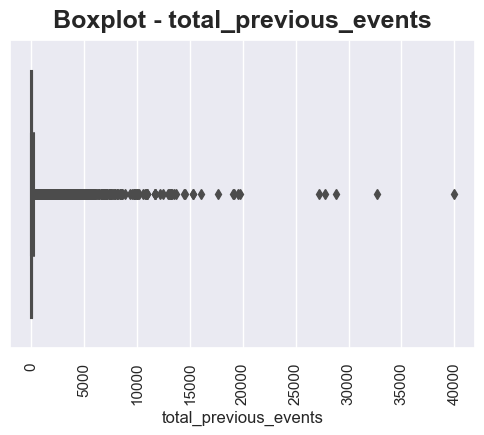

In [63]:
from visualization import boxplot
boxplot(data, 'total_previous_events')

In [64]:
previous_events_describe = data.total_previous_events.describe()
previous_events_describe

count    214160.00000
mean        136.05466
std         406.15579
min           1.00000
25%          12.00000
50%          36.00000
75%         115.00000
max       39953.00000
Name: total_previous_events, dtype: float64

In [65]:
# convierto a nulo los outliers (superiores a 1.5 * rango intercuartil)
rango_inter_cuartil_prev_events = previous_events_describe.loc['75%'] - previous_events_describe.loc['25%']
data['total_previous_events'] = data['total_previous_events'].apply(lambda x: np.nan if x > rango_inter_cuartil_prev_events * 1.5 else x)

In [66]:
# ahora imputamos los nulos que agregamos
from sklearn.impute import SimpleImputer

sessions_imp = SimpleImputer(strategy="most_frequent")
sessions_imp.fit(data[['total_previous_events']])
data[['total_previous_events']] = sessions_imp.transform(data[['total_previous_events']])
data.total_previous_events.describe()

count    214160.000000
mean         30.669551
std          36.748509
min           1.000000
25%           2.000000
50%          15.000000
75%          45.000000
max         154.000000
Name: total_previous_events, dtype: float64

<u>**total_sessions_prev**<u/>

<AxesSubplot:ylabel='Frequency'>

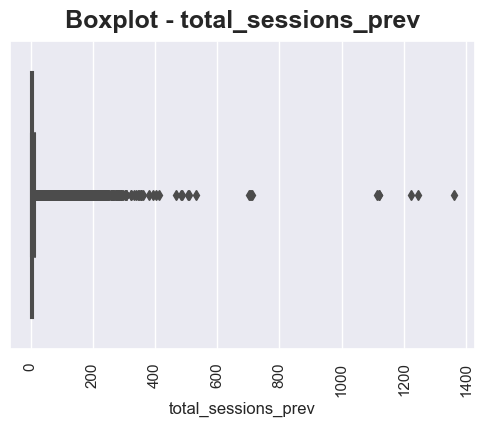

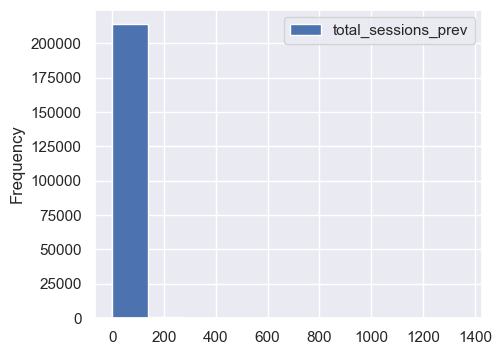

In [67]:
# vemos que hay una gran cantidad de outliers, hay que definir un criterio para quitarlos y estandarizar
from visualization import boxplot

boxplot(data, 'total_sessions_prev')
data[['total_sessions_prev']].plot.hist(bins=10)


In [68]:
previous_sessions_describe = data.total_sessions_prev.describe()
previous_sessions_describe

count    214160.000000
mean          6.660035
std          14.556284
min           1.000000
25%           2.000000
50%           3.000000
75%           6.000000
max        1361.000000
Name: total_sessions_prev, dtype: float64

In [69]:
# convierto a nulo los outliers (superiores a 1.5 * rango intercuartil)
rango_inter_cuartil_prev_sessions = previous_sessions_describe.loc['75%'] - previous_sessions_describe.loc['25%']
data['total_sessions_prev'] = data['total_sessions_prev'].apply(lambda x: np.nan if x > rango_inter_cuartil_prev_sessions * 1.5 else x)


In [70]:
# ahora imputamos los nulos que agregamos
from sklearn.impute import SimpleImputer

sessions_imp = SimpleImputer(strategy="most_frequent")
sessions_imp.fit(data[['total_sessions_prev']])
data[['total_sessions_prev']] = sessions_imp.transform(data[['total_sessions_prev']])
data.total_sessions_prev.describe()

count    214160.000000
mean          2.680958
std           1.221608
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           6.000000
Name: total_sessions_prev, dtype: float64

<u>**Events columns**<u/>

In [71]:
# todas tienen maximos muy altos, son outliers y tenemos que estandarizar
data[events_cols].describe()

,total_previous_vipphoto_selected,total_previous_vip360view_selected,total_previous_catalogfilter_selected,total_previous_vip_viewed,total_previous_cataloglist_viewed,total_previous_home_viewed,total_previous_year_selected,total_previous_make_selected,total_previous_model_selected,total_previous_version_selected,total_previous_mileage_selected,total_previous_location_selected,total_previous_color_selected
count,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000
mean,5.022619,0.549743,28.677615,25.250299,35.365283,4.779613,0.372913,0.376718,0.339470,0.324351,0.299220,0.262229,0.247086
std,49.460406,5.033431,122.384672,81.485442,177.395937,22.261192,1.913053,1.884517,1.705465,1.657433,1.599664,1.538530,1.416469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,18.000000,20.000000,14.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8286.000000,694.000000,11739.000000,6743.000000,21358.000000,2546.000000,320.000000,226.000000,223.000000,223.000000,211.000000,207.000000,213.000000


In [72]:
# agrego nulos en los registros de cada columna que sean mayores a 30
# Es decir, si en una sesión un usuario realizó más de 30 veces un mismo evento lo consideramos un outlier
for i in events_cols:
    data[i] = data[i].apply(lambda x: np.nan if x > 30 else x)

data[events_cols].isnull().sum()

total_previous_vipphoto_selected          6985
total_previous_vip360view_selected         440
total_previous_catalogfilter_selected    38742
total_previous_vip_viewed                39632
total_previous_cataloglist_viewed        38798
total_previous_home_viewed                6694
total_previous_year_selected                76
total_previous_make_selected                77
total_previous_model_selected               73
total_previous_version_selected             63
total_previous_mileage_selected             65
total_previous_location_selected            58
total_previous_color_selected               42
dtype: int64

In [73]:
# remplazo los valores que transforme a nulos usando la mediana
from sklearn.impute import SimpleImputer

events_imp = SimpleImputer(strategy="median")
for i in events_cols:
    events_imp.fit(data[[i]])
    data[[i]] = events_imp.transform(data[[i]])

In [74]:
data[events_cols].describe()

,total_previous_vipphoto_selected,total_previous_vip360view_selected,total_previous_catalogfilter_selected,total_previous_vip_viewed,total_previous_cataloglist_viewed,total_previous_home_viewed,total_previous_year_selected,total_previous_make_selected,total_previous_model_selected,total_previous_version_selected,total_previous_mileage_selected,total_previous_location_selected,total_previous_color_selected
count,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000
mean,0.634465,0.398576,3.710940,5.700434,2.289755,2.454118,0.351312,0.354847,0.320457,0.307275,0.282378,0.246647,0.235506
std,3.190739,1.771812,6.767573,6.868105,5.865861,4.894182,1.254396,1.311784,1.185994,1.157855,1.116071,1.064669,1.007010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,4.000000,8.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000


<u>**Time on screen**<u/>

In [75]:
# vemos outliers
screen_time_describe = data.time_on_screen_prev.describe()
screen_time_describe.round(2)

count      214160.00
mean        85183.72
std        617241.53
min             0.00
25%           192.00
50%           914.00
75%          3426.00
max      18376616.00
Name: time_on_screen_prev, dtype: float64

In [76]:
# convierto a nulo los outliers (superiores a 2 * rango inter cuartil)
data['time_on_screen_prev'] = data['time_on_screen_prev'].apply(
    lambda x: np.nan if x > screen_time_describe.loc['75%'] * 2 else x)

In [77]:
data.time_on_screen_prev.isnull().sum()

32359

In [78]:
# ahora imputamos los nulos que agregamos
from sklearn.impute import SimpleImputer

screen_time_imp = SimpleImputer(strategy="most_frequent")
screen_time_imp.fit(data[['time_on_screen_prev']])
data[['time_on_screen_prev']] = screen_time_imp.transform(data[['time_on_screen_prev']])

# <u>7. Escalado<u/>

<u>**Eventos previos**<u/>


<AxesSubplot:ylabel='Frequency'>

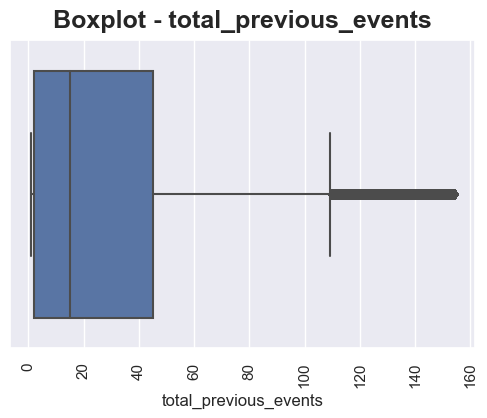

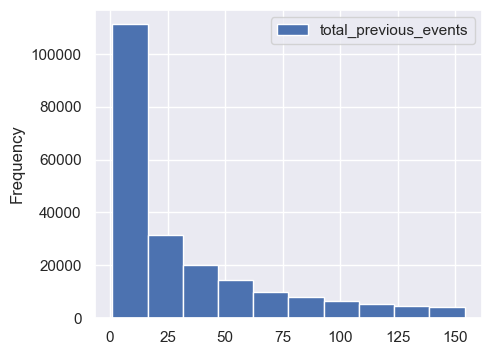

In [79]:
boxplot(data, 'total_previous_events')
data[['total_previous_events']].plot.hist(bins=10)

In [80]:
# aplicamos robust scaler para tratar los outliers
from sklearn.preprocessing import RobustScaler

escalador_robusto = RobustScaler()

data[['total_previous_events']] = escalador_robusto.fit_transform(data[['total_previous_events']])
data[['total_previous_events']].describe()

,total_previous_events
count,214160.000000
mean,0.364408
std,0.854616
min,-0.325581
25%,-0.302326
50%,0.000000
75%,0.697674
max,3.232558


<u>**Sesiones previas**<u/>

<AxesSubplot:ylabel='Frequency'>

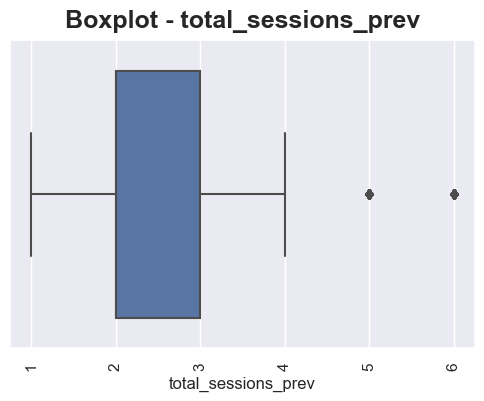

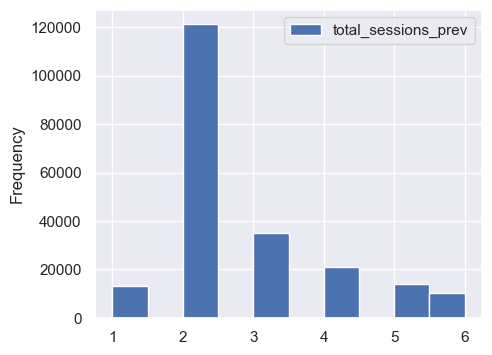

In [81]:
boxplot(data, 'total_sessions_prev')
data[['total_sessions_prev']].plot.hist(bins=10)

In [82]:
# aplicamos robust scaler para tratar los outliers
data[['total_sessions_prev']] = escalador_robusto.fit_transform(data[['total_sessions_prev']])
data[['total_sessions_prev']].describe()

,total_sessions_prev
count,214160.000000
mean,0.680958
std,1.221608
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,4.000000


<u>**Event columns**<u/>

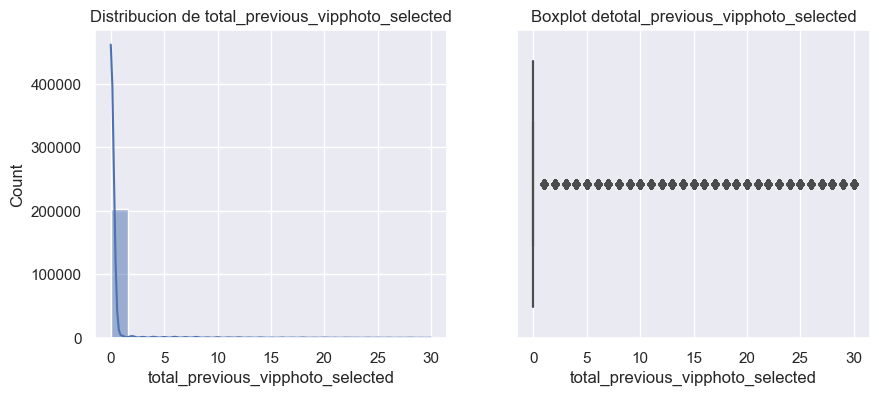

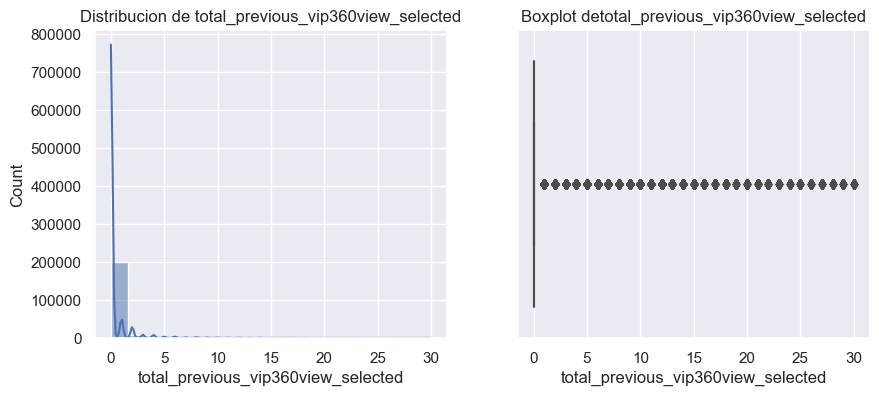

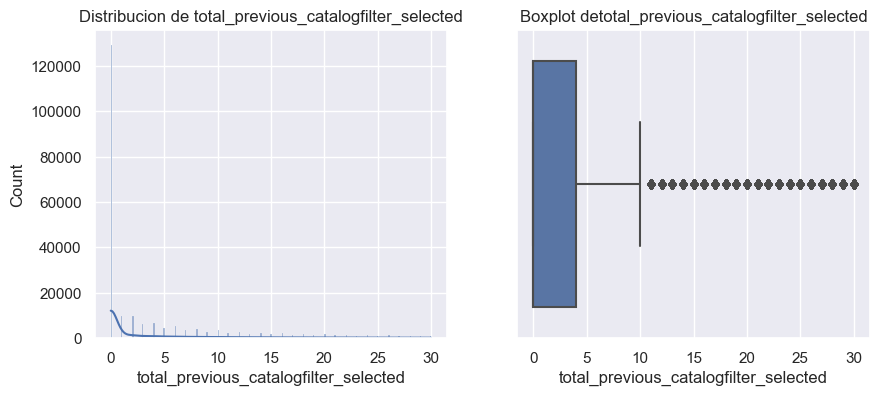

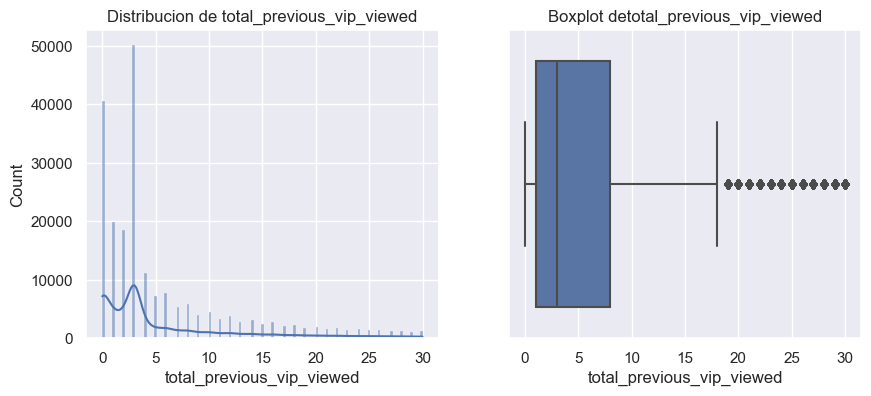

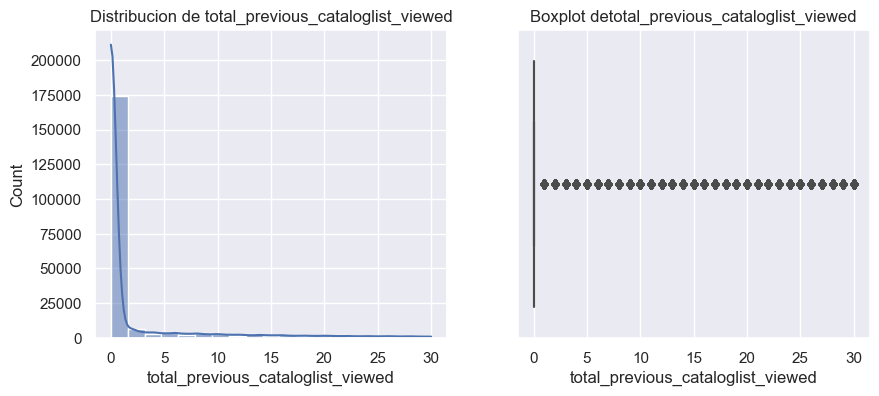

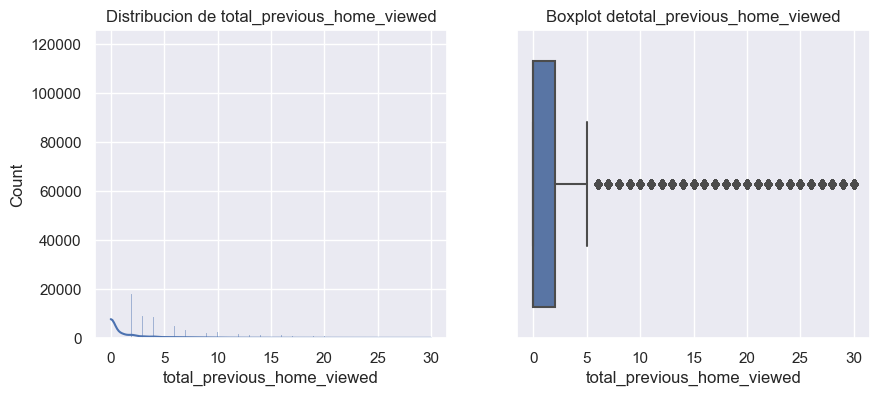

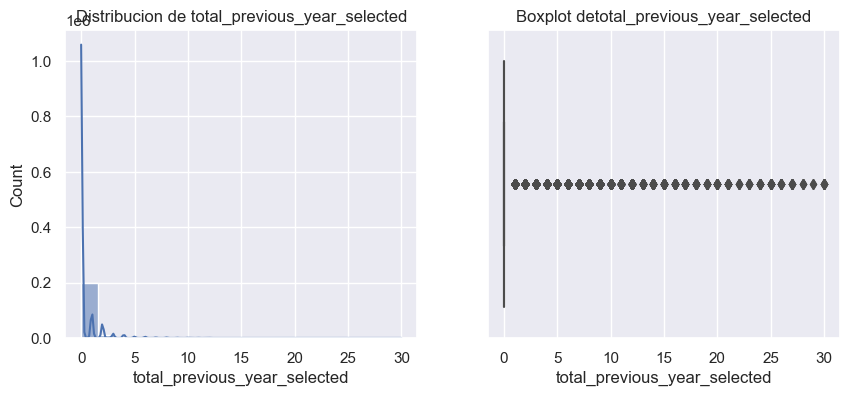

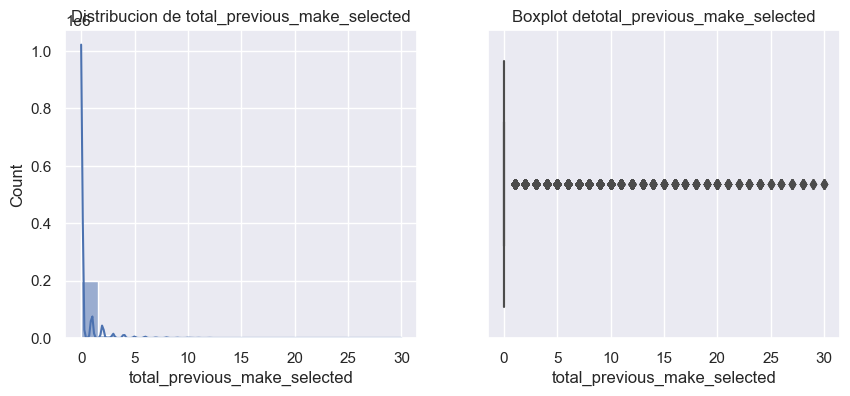

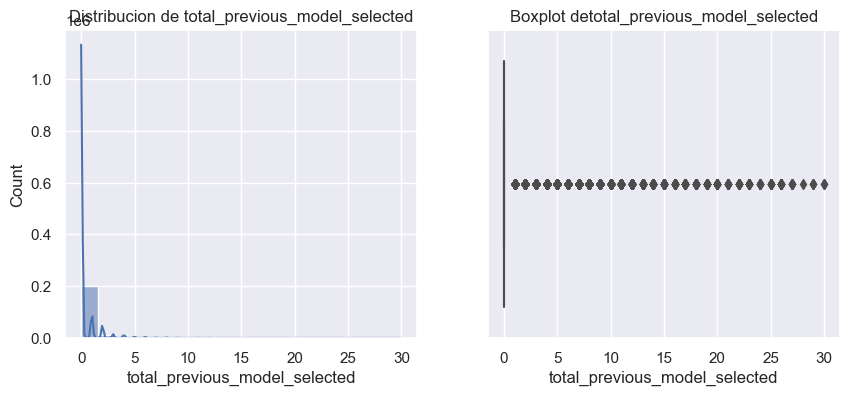

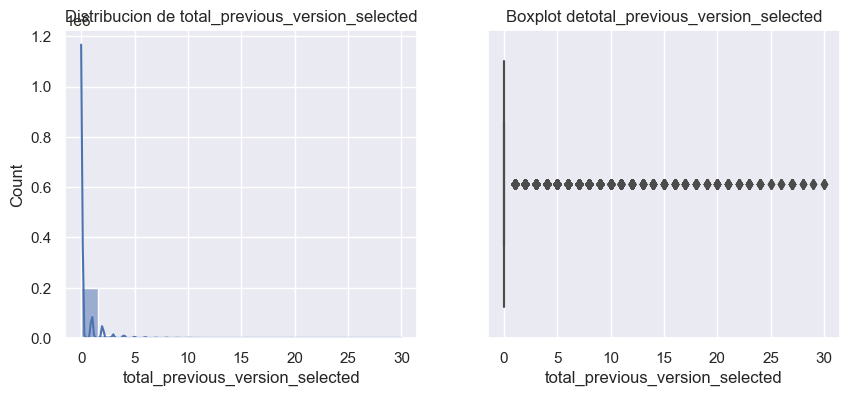

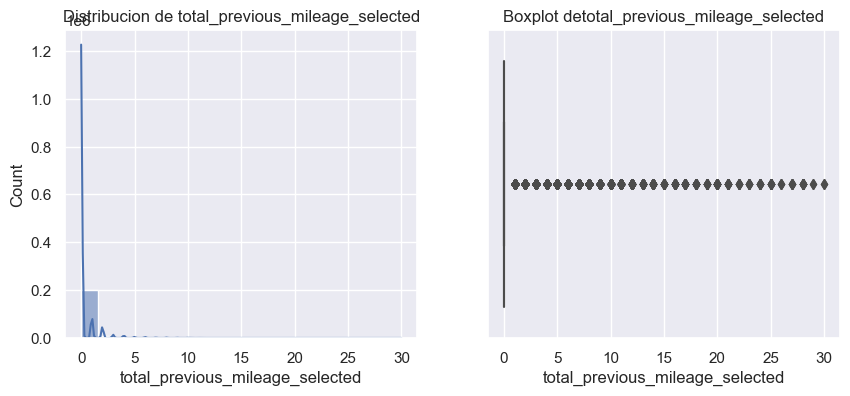

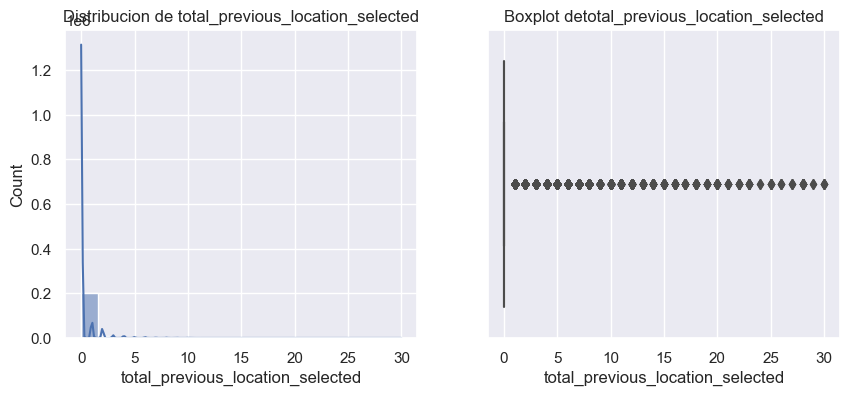

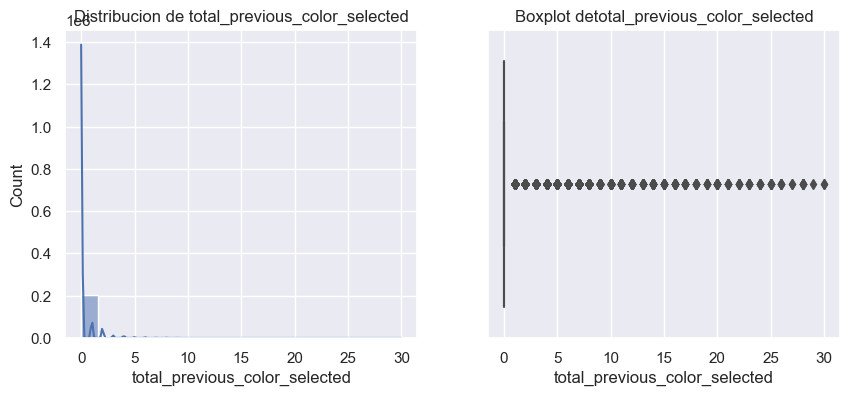

In [83]:
# boxplot para ver como quedaron
for i in events_cols:
    fig, ax = plt.subplots(1,2,figsize=(10,4))

    ax[0].set_title(f"Distribucion de {i}")
    sns.histplot(data = data, x = f"{i}", kde=True, ax = ax[0])

    ax[1].set_title(f"Boxplot de{i}")
    sns.boxplot(data = data, x = f"{i}", ax=ax[1]);

In [84]:
# Volvemos a usar Robust scaler para tratar outliers
for i in events_cols:
    data[[i]] = escalador_robusto.fit_transform(data[[i]])

<u>**Time on screen**<u/>

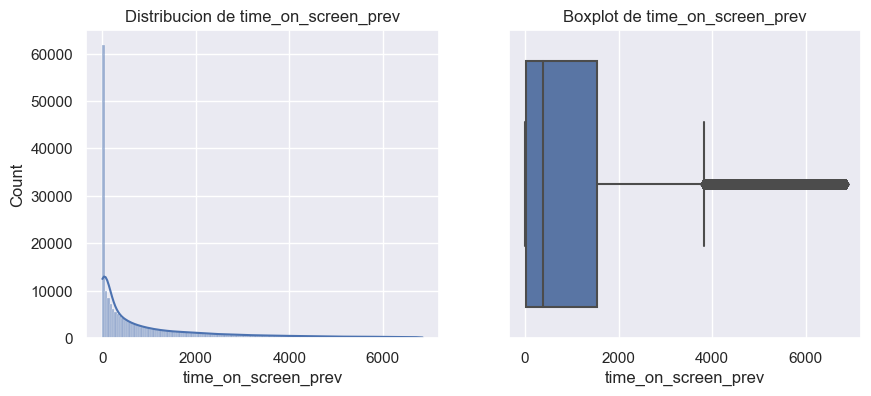

In [85]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].set_title(f"Distribucion de time_on_screen_prev")
sns.histplot(data = data, x ='time_on_screen_prev', kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de time_on_screen_prev")
sns.boxplot(data = data, x = 'time_on_screen_prev', ax=ax[1]);

In [86]:
# aplicamos robust scaler para tratar los outliers
data[['time_on_screen_prev']] = escalador_robusto.fit_transform(data[['time_on_screen_prev']])
data[['time_on_screen_prev']].describe()

,time_on_screen_prev
count,214160.000000
mean,0.456643
std,0.995708
min,-0.254093
25%,-0.246889
50%,0.000000
75%,0.753111
max,4.233137


# <u>8. Encoding<u/>

<u>**Device model**<u/>

In [87]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(data[['device_model']])
enginetype_encoded = ohe.transform(data[['device_model']])

data[ohe.get_feature_names_out()] = enginetype_encoded

data.drop(columns='device_model', inplace = True)

data.columns

Index(['total_previous_events', 'total_previous_vipphoto_selected',
       'total_previous_vip360view_selected',
       'total_previous_catalogfilter_selected', 'total_previous_vip_viewed',
       'total_previous_cataloglist_viewed', 'total_previous_home_viewed',
       'total_previous_year_selected', 'total_previous_make_selected',
       'total_previous_model_selected', 'total_previous_version_selected',
       'total_previous_mileage_selected', 'total_previous_location_selected',
       'total_previous_color_selected', 'region', 'time_on_screen_prev',
       'total_sessions_prev', 'reserved', 'avg_time_previous_sessions',
       'device_model_Android', 'device_model_Mac', 'device_model_Motorola',
       'device_model_Others', 'device_model_SM', 'device_model_Windows',
       'device_model_iPhone'],
      dtype='object')

<u>**Region**<u/>

In [88]:
data.region.value_counts()

Mexico City            127513
Jalisco                 23953
Nuevo León              15623
Puebla                  10364
Querétaro                8517
None                     3655
Guanajuato               2825
Veracruz                 2500
Morelos                  2362
Chihuahua                1808
Hidalgo                  1768
Tlaxcala                 1347
Michoacán                1340
Coahuila                 1320
Tamaulipas               1203
Quintana Roo              941
San Luis Potosí           799
Sinaloa                   741
Guerrero                  705
Baja California           619
Yucatán                   585
Tabasco                   568
Oaxaca                    480
Aguascalientes            453
Chiapas                   444
Colima                    349
Zacatecas                 322
Sonora                    253
Nayarit                   249
Campeche                  206
Durango                   196
Baja California Sur       152
Name: region, dtype: Int64

In [89]:
# hago una copia del dataset antes de hacer el encodeo de region porque voy probar un modelo solo para ciudad de mexico mas adelante
data_mexico_city = data.copy()
data_mexico_city = data_mexico_city[data_mexico_city.region == 'Mexico City']
data_mexico_city.drop(columns='region',inplace=True)

In [90]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(data[['region']])
enginetype_encoded = ohe.transform(data[['region']])

data[ohe.get_feature_names_out()] = enginetype_encoded


data.drop(columns='region', inplace = True)

data.columns

Index(['total_previous_events', 'total_previous_vipphoto_selected',
       'total_previous_vip360view_selected',
       'total_previous_catalogfilter_selected', 'total_previous_vip_viewed',
       'total_previous_cataloglist_viewed', 'total_previous_home_viewed',
       'total_previous_year_selected', 'total_previous_make_selected',
       'total_previous_model_selected', 'total_previous_version_selected',
       'total_previous_mileage_selected', 'total_previous_location_selected',
       'total_previous_color_selected', 'time_on_screen_prev',
       'total_sessions_prev', 'reserved', 'avg_time_previous_sessions',
       'device_model_Android', 'device_model_Mac', 'device_model_Motorola',
       'device_model_Others', 'device_model_SM', 'device_model_Windows',
       'device_model_iPhone', 'region_Aguascalientes',
       'region_Baja California', 'region_Baja California Sur',
       'region_Campeche', 'region_Chiapas', 'region_Chihuahua',
       'region_Coahuila', 'region_Colima', 're

# <u>9. Modelo Base<u/>

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.inspection import permutation_importance


In [92]:
# Hipotesis nula: 91.5% de las sesiones no reservaron
data.reserved.value_counts(normalize=True)

0.0    0.91519
1.0    0.08481
Name: reserved, dtype: float64

#### <u>**Train Test Split**<u/>

In [93]:
# Definimos la matríz de features y vector objetivo
X = data.drop('reserved', axis=1)
y = data.reserved

# Dividimos datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,  stratify=y, random_state = 12)

In [94]:
print(X_train.shape)
print(X_test.shape)

(149912, 56)
(64248, 56)


#### <u>**Regresion Logistica**<u/>

In [95]:
# Instanciamos un objeto de la clase
logistic_regression = LogisticRegression()

# Ajustamos el modelo
logistic_regression.fit(X_train, y_train)

# crossval scores
cv_acc_scores= cross_val_score(logistic_regression, X_train, y_train, cv = 5)
base_model_score = cv_acc_scores.mean()
print('Accuracy')
print(cv_acc_scores)
print(f'El accuracy score promedio fue de: {base_model_score.round(3)}\n');

C:\Users\alejo\poo_teorica\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy
[0.91505186 0.91318414 0.91511574 0.91504903 0.90924555]
El accuracy score promedio fue de: 0.914



El modelo performa igual o por debajo de la hipotesis nula, vamos a probar con seleccion de variables y ver si asi logramos mejorarlo.

In [96]:
# tarda unos minutos en correr

# voy a optimizar el modelo viendo las variables que mas influyen
model = LogisticRegression().fit(X_train, y_train)
permutation_score = permutation_importance(model, X_train, y_train, n_repeats=50)
importance_df = pd.DataFrame(np.vstack((X_train.columns,
                                        permutation_score.importances_mean)).T,
                             columns=['feature', 'feature_importance'])

print("Despues de la permutacion de variables, asi decrece el score en terminos de variables:")
importance_df = importance_df.sort_values(by="feature_importance", ascending=False)
importance_df

Despues de la permutacion de variables, asi decrece el score en terminos de variables:


,feature,feature_importance
23,device_model_iPhone,0.000204
37,region_Mexico City,0.000198
16,avg_time_previous_sessions,0.00019
22,device_model_Windows,0.000168
7,total_previous_year_selected,0.000045
42,region_Nuevo León,0.000043
8,total_previous_make_selected,0.000028
36,region_Jalisco,0.000021
45,region_Querétaro,0.000013
9,total_previous_model_selected,0.000012


In [97]:
# Agrego un umbral para quitar las variables que no tienen peso sobre el modelo
umbral = 0
weak_features = importance_df[importance_df.feature_importance <= umbral]["feature"].values

X_strong_features = data.drop(columns=list(weak_features) + ["reserved"])

print(f'Las variables fuertes son {list(X_strong_features.columns)}')

Las variables fuertes son ['total_previous_year_selected', 'total_previous_make_selected', 'total_previous_model_selected', 'avg_time_previous_sessions', 'device_model_Windows', 'device_model_iPhone', 'region_Jalisco', 'region_Mexico City', 'region_Nuevo León', 'region_Puebla', 'region_Querétaro', 'region_Veracruz']


In [98]:
scores = cross_val_score(logistic_regression, X_strong_features, y, cv=5)
strong_model_score = scores.mean()

print(f'El accuracy score promedio antes era: {base_model_score.round(3)}')

print(f"El modelo entrenado con las variables fuertes da un accuracy de {strong_model_score.round(3)}")


El accuracy score promedio antes era: 0.914
El modelo entrenado con las variables fuertes da un accuracy de 0.915


Vemos que la mejora con la seleccion de variables es muy leve.

In [99]:
# Hacemos predicciones con el modelo entrenado para comprobar que en el set de testeo el modelo prediga igual
y_pred = logistic_regression.predict(X_test)


#### <u>**Performance del modelo**<u/>

In [100]:
print('Las metricas de performance de la prediccion son:')
print(f'Accuracy score: {accuracy_score(y_test, y_pred).round(3)}\n')
print(f'Recall score: {recall_score(y_test, y_pred).round(2)}\n')
print(f'Precision score: {precision_score(y_test, y_pred).round(2)}\n')

Las metricas de performance de la prediccion son:
Accuracy score: 0.913

Recall score: 0.01

Precision score: 0.2



Vemos que recall y precision scores son iguales a 0.
En la matriz de confusion vemos que el modelo no predice positivos, y es por eso que estas dos metricas son iguales a 0.

Recall score = True Positives / True Positives + False Negatives

Precision score = True Positives / True Positives + False Positives

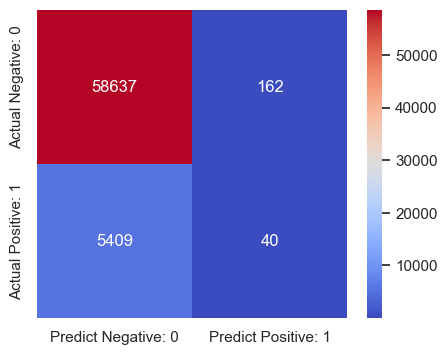

In [101]:
# Graficamos la matriz de confusion
confmat_lru = confusion_matrix(y_test, y_pred)
confmat_df_lru= pd.DataFrame(data=confmat_lru,
                           index=['Actual Negative: 0', 'Actual Positive: 1'],
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])

sns.heatmap(confmat_df_lru, annot=True, fmt='d', cmap='coolwarm');

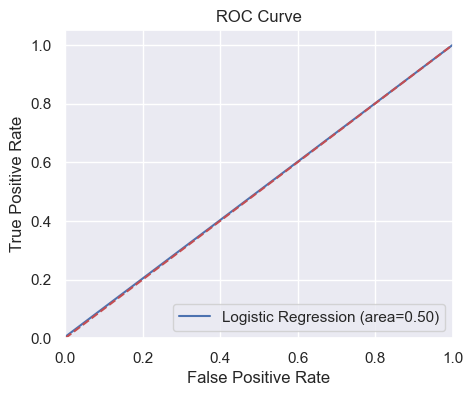

In [102]:
from visualization import plot_roc_curve
plot_roc_curve(y_test, y_pred)

La curva ROC - AUC permite ver el grado de separabilidad de nuestra variable objetivo, y en que medida el modelo es capaz de distinguir entre las clases.

Cuanto mas grande el area o AUC, mejor separa el modelo y predice los positivos como positivos y los negativos como negativos.

Vemos que el are (AUC) a es igual a 0.5, este es el peor escenario para el modelo de regresion logistica ya que significa que el modelo no puede discriminar entre los positivos y negativos.

AGREGAR CONCLUSION BREVE DEL MODELO

# <u>10.Modelo con undersampling<u/>

Voy a realizar un undersampling para tener un dataset con la variable target balanceada y de esta manera ver si encontramos un modelo que prediga mejor

In [103]:
reserved = data[data['reserved']==1]
not_reserved = data[data['reserved']==0]
not_reserved = not_reserved.sample(n=len(reserved), random_state=101)
data_undersampling = pd.concat([reserved,not_reserved],axis=0)


print(f'El dataset con undersampling tiene {data_undersampling.shape[0]} filas y {data_undersampling.shape[1]} columnas.')
print(f'El dataset contiene {data_undersampling.reserved.value_counts()[1]} registros con reserva y {data_undersampling.reserved.value_counts()[0]} sin reserva.')

El dataset con undersampling tiene 36326 filas y 57 columnas.
El dataset contiene 18163 registros con reserva y 18163 sin reserva.


In [104]:
# Hipótesis nula: el dataset está partido para que la variable 'y' esté balanceada 50/50 entonces la hipótesis nula es 50%
data_undersampling.reserved.value_counts(normalize=True)

1.0    0.5
0.0    0.5
Name: reserved, dtype: float64

#### <u>**Train Test Split**<u/>

In [105]:
# Definimos la matríz de features y vector objetivo
X_under = data_undersampling.drop('reserved', axis=1)
y_under = data_undersampling.reserved

In [106]:
# Dividimos datos de entrenamiento y testeo
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.30, stratify=y_under, random_state=12)

#### <u>**Regresion Logistica**<u/>

In [107]:
# Instanciamos un objeto de la clase
logistic_regression = LogisticRegression()

# Ajustamos el modelo
logistic_regression.fit(X_train_under, y_train_under)

# crossval scores
cv_acc_scores = cross_val_score(logistic_regression, X_train_under, y_train_under, cv=10)
base_model_score = cv_acc_scores.mean()
print('Accuracy')
print(cv_acc_scores)
print(f'El accuracy score promedio fue de: {base_model_score.round(3)}\n');

Accuracy
[0.52143138 0.51985843 0.58906803 0.51828549 0.51631931 0.52103814
 0.51710578 0.51985843 0.52084972 0.52084972]
El accuracy score promedio fue de: 0.526



Vemos un accuracy score apenas superior al 50% de hipotesis nula, lo que nos lleva a pensar que el balanceo mejora un poco la performance del modelo.

In [108]:
# demora en correr unos minutos

# Busco mejorar la performance del modelo eligiendo las variables con mejor valor de prediccion

model = LogisticRegression().fit(X_train_under,y_train_under)
permutation_score = permutation_importance(model, X_train_under, y_train_under, n_repeats=100)
importance_df = pd.DataFrame(np.vstack((X_train_under.columns,
                                        permutation_score.importances_mean)).T,
                            columns = ['feature','feature_importance'])

print("Despues de la permutacion de variables, asi decrece el score en terminos de variables:")
importance_df = importance_df.sort_values(by="feature_importance", ascending = False)
importance_df

Despues de la permutacion de variables, asi decrece el score en terminos de variables:


,feature,feature_importance
16,avg_time_previous_sessions,0.015687
6,total_previous_home_viewed,0.008674
14,time_on_screen_prev,0.003059
2,total_previous_vip360view_selected,0.002287
15,total_sessions_prev,0.00201
3,total_previous_catalogfilter_selected,0.001989
1,total_previous_vipphoto_selected,0.00119
8,total_previous_make_selected,0.000572
9,total_previous_model_selected,0.000352
7,total_previous_year_selected,0.000349


In [109]:
# Agrego un umbral para quitar las variables que no tienen peso sobre el modelo
umbral = 0.001
weak_features = importance_df[importance_df.feature_importance <= umbral]["feature"].values
weak_features

array(['total_previous_make_selected', 'total_previous_model_selected',
       'total_previous_year_selected', 'total_previous_location_selected',
       'total_previous_mileage_selected',
       'total_previous_version_selected', 'total_previous_vip_viewed',
       'total_previous_color_selected', 'total_previous_events',
       'device_model_iPhone', 'region_Jalisco', 'device_model_Mac',
       'region_Yucatán', 'region_Michoacán', 'region_Morelos',
       'region_Nayarit', 'region_None', 'region_Nuevo León',
       'region_Oaxaca', 'region_Puebla', 'region_Mexico City',
       'region_Tlaxcala', 'region_Quintana Roo', 'region_San Luis Potosí',
       'region_Sinaloa', 'region_Veracruz', 'region_Sonora',
       'region_Tabasco', 'region_Tamaulipas', 'region_Querétaro',
       'region_Chiapas', 'region_Hidalgo', 'region_Campeche',
       'device_model_Motorola', 'region_Aguascalientes',
       'region_Guerrero', 'region_Baja California Sur',
       'region_Baja California', 'region_Ch

In [110]:
X_strong_features = data_undersampling.drop(columns=list(weak_features) + ["reserved"])

print(f'Las variables fuertes son {list(X_strong_features.columns)}')

scores = cross_val_score(logistic_regression, X_strong_features, y_under, cv=5)
strong_model_score = scores.mean()

Las variables fuertes son ['total_previous_vipphoto_selected', 'total_previous_vip360view_selected', 'total_previous_catalogfilter_selected', 'total_previous_home_viewed', 'time_on_screen_prev', 'total_sessions_prev', 'avg_time_previous_sessions']


In [111]:
print(f'El accuracy score promedio antes era: {base_model_score.round(3)}')

print(f"El modelo entrenado con las variables fuertes da un accuracy de {strong_model_score.round(3)}")

El accuracy score promedio antes era: 0.526
El modelo entrenado con las variables fuertes da un accuracy de 0.525


Probando el modelo con las variables fuertes vemos que el accuracy score es muy similar, incluso un poco peor.

#### <u>**Performance del modelo**<u/>

In [112]:
# Hacemos predicciones con el modelo entrenado
y_pred_under = logistic_regression.predict(X_test_under)

Las metricas de performance de la prediccion son:
Accuracy score: 0.515

Recall score: 0.98

Precision score: 0.51



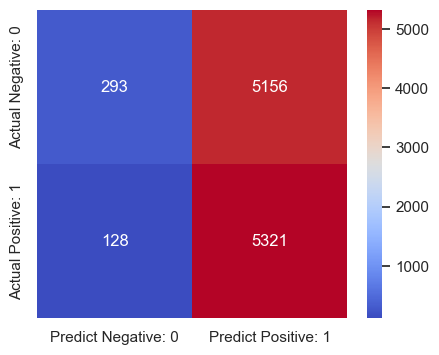

In [113]:
print('Las metricas de performance de la prediccion son:')
print(f'Accuracy score: {accuracy_score(y_test_under, y_pred_under).round(3)}\n')
print(f'Recall score: {recall_score(y_test_under, y_pred_under).round(2)}\n')
print(f'Precision score: {precision_score(y_test_under, y_pred_under).round(2)}\n')
# Graficamos la matriz de confusion
confmat_lru = confusion_matrix(y_test_under, y_pred_under)
confmat_df_lru = pd.DataFrame(data=confmat_lru,
                              index=['Actual Negative: 0', 'Actual Positive: 1'],
                              columns=['Predict Negative: 0', 'Predict Positive: 1'])

sns.heatmap(confmat_df_lru, annot=True, fmt='d', cmap='coolwarm');

Vemos que el modelo ahora al menos predice para ambas categorias, sin embargo predice que casi todos los registros son positivos (reservaron un auto).

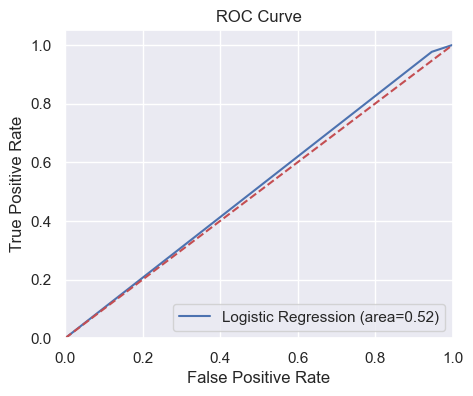

In [114]:
from visualization import plot_roc_curve
plot_roc_curve(y_test_under, y_pred_under)

En cuanto a la curva ROC, vemos que el area creció un poco con respecto al modelo anterior. Sin embargo, todavía sigue muy cercana al 0.5 que es nuestro peor escenario.

# <u>11. Modelo ciudad de Mexico<u/>

In [115]:
data_mexico_city.shape

(127513, 25)

In [116]:
data_mexico_city.reserved.value_counts(normalize=True)

0.0    0.909813
1.0    0.090187
Name: reserved, dtype: float64

In [117]:
reserved = data_mexico_city[data_mexico_city['reserved']==1]
not_reserved = data_mexico_city[data_mexico_city['reserved']==0]
not_reserved = not_reserved.sample(n=len(reserved), random_state=101)
data_undersampling_mex = pd.concat([reserved,not_reserved],axis=0)


print(f'El dataset con undersampling tiene {data_undersampling_mex.shape[0]} filas y {data_undersampling_mex.shape[1]} columnas.')
print(f'El dataset contiene {data_undersampling_mex.reserved.value_counts()[1]} registros con reserva y {data_undersampling_mex.reserved.value_counts()[0]} sin reserva.')

El dataset con undersampling tiene 23000 filas y 25 columnas.
El dataset contiene 11500 registros con reserva y 11500 sin reserva.


In [118]:
# Hipótesis nula: el dataset está partido para que la variable 'y' esté balanceada 50/50 entonces la hipótesis nula es 50%
data_undersampling_mex.reserved.value_counts(normalize=True)

1.0    0.5
0.0    0.5
Name: reserved, dtype: float64

#### <u>**Train Test Split**<u/>

In [119]:
# Definimos la matríz de features y vector objetivo
X_mex_under = data_undersampling_mex.drop('reserved', axis=1)
y_mex_under = data_undersampling_mex.reserved
# Dividimos datos de entrenamiento y testeo
X_train_mex_under, X_test_mex_under, y_train_mex_under, y_test_mex_under = train_test_split(X_mex_under, y_mex_under, test_size=0.30, stratify=y_mex_under, random_state=12)

#### <u>**Regresion Logistica**<u/>

In [120]:
# Ajustamos el modelo
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_mex_under, y_train_mex_under)

# crossval scores
cv_acc_scores = cross_val_score(logistic_regression, X_train_mex_under, y_train_mex_under, cv=10)
base_model_score_mex = cv_acc_scores.mean()
print('Accuracy')
print(cv_acc_scores)
print(f'El accuracy score promedio fue de: {base_model_score_mex.round(3)}\n');

Accuracy
[0.51677019 0.52173913 0.51801242 0.58695652 0.5173913  0.52049689
 0.52608696 0.50869565 0.51552795 0.52484472]
El accuracy score promedio fue de: 0.526



In [121]:
# demora en correr unos minutos

# Busco mejorar la performance del modelo eligiendo las variables con mejor valor de prediccion

from sklearn.inspection import permutation_importance

model = LogisticRegression().fit(X_train_mex_under, y_train_mex_under)
permutation_score = permutation_importance(model, X_train_mex_under, y_train_mex_under, n_repeats=100)
importance_df = pd.DataFrame(np.vstack((X_train_mex_under.columns,
                                        permutation_score.importances_mean)).T,
                             columns=['feature', 'feature_importance'])

print("Despues de la permutacion de variables, asi decrece el score en terminos de variables:")
importance_df = importance_df.sort_values(by="feature_importance", ascending=False)
importance_df

Despues de la permutacion de variables, asi decrece el score en terminos de variables:


,feature,feature_importance
16,avg_time_previous_sessions,0.015686
6,total_previous_home_viewed,0.008898
3,total_previous_catalogfilter_selected,0.003145
14,time_on_screen_prev,0.003052
2,total_previous_vip360view_selected,0.001688
15,total_sessions_prev,0.001199
1,total_previous_vipphoto_selected,0.001114
8,total_previous_make_selected,0.000475
9,total_previous_model_selected,0.000313
10,total_previous_version_selected,0.000301


In [122]:
# Agrego un umbral para quitar las variables que no tienen peso sobre el modelo
umbral = 0.001
weak_features = importance_df[importance_df.feature_importance <= umbral]["feature"].values
X_strong_features = data_undersampling_mex.drop(columns=list(weak_features) + ["reserved"])

print(f'Las variables fuertes son {list(X_strong_features.columns)}')

Las variables fuertes son ['total_previous_vipphoto_selected', 'total_previous_vip360view_selected', 'total_previous_catalogfilter_selected', 'total_previous_home_viewed', 'time_on_screen_prev', 'total_sessions_prev', 'avg_time_previous_sessions']


In [123]:
scores = cross_val_score(logistic_regression, X_strong_features, y_mex_under, cv=5)
strong_model_score = scores.mean()
print(f'El accuracy score promedio antes era: {base_model_score_mex.round(3)}')

print(f"El modelo entrenado con las variables fuertes da un accuracy de {strong_model_score.round(3)}")

El accuracy score promedio antes era: 0.526
El modelo entrenado con las variables fuertes da un accuracy de 0.527


El modelo con las features mas fuertes mejora muy poco el accuracy score

#### <u>**Performance del modelo**<u/>

Las metricas de performance de la prediccion son:
Accuracy score: 0.519

Recall score: 0.98

Precision score: 0.51



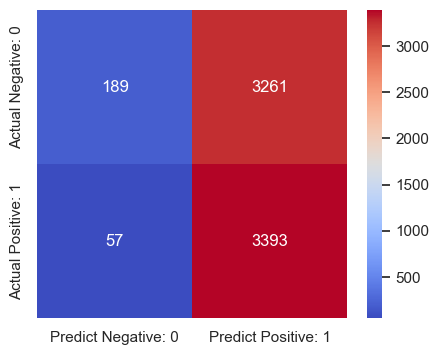

In [124]:
# Hacemos predicciones con el modelo entrenado
y_pred_mex_under = logistic_regression.predict(X_test_mex_under)

from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

print('Las metricas de performance de la prediccion son:')
print(f'Accuracy score: {accuracy_score(y_test_mex_under, y_pred_mex_under).round(3)}\n')
print(f'Recall score: {recall_score(y_test_mex_under, y_pred_mex_under).round(2)}\n')
print(f'Precision score: {precision_score(y_test_mex_under, y_pred_mex_under).round(2)}\n')
# Graficamos la matriz de confusion
confmat_lru = confusion_matrix(y_test_mex_under, y_pred_mex_under)
confmat_df_lru = pd.DataFrame(data=confmat_lru,
                              index=['Actual Negative: 0', 'Actual Positive: 1'],
                              columns=['Predict Negative: 0', 'Predict Positive: 1'])

sns.heatmap(confmat_df_lru, annot=True, fmt='d', cmap='coolwarm');

AGREGAR ANALISIS

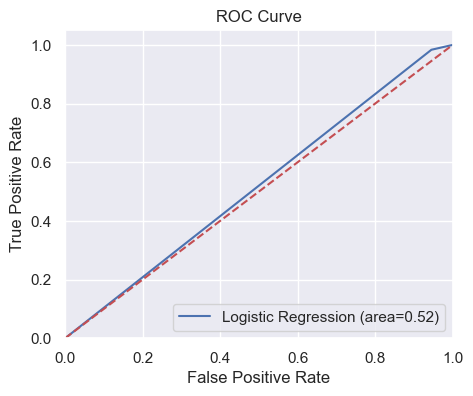

In [125]:
from visualization import plot_roc_curve
plot_roc_curve(y_test_mex_under, y_pred_mex_under)

La curva ROC se mantuvo igual que en el modelo anterior, el modelo no logra separar adecuadamente las clases negativas y positivas.

# <u>13. Conclusiones<u/>

Como vemos en las métricas de performance, el modelo no predice correctamente, ni siquiera predice positivos.

Vemos que los registros que eran positivos el modelo también los predice como negativos, esto es porque el modelo predice todo el tiempo que los registros son de una sola categoría.

Esto lo vemos también en el accuracy score, que al ser igual que la hipótesis nula (91.5% de los registros del dataset no reservaron auto) es lo mismo que el modelo prediga para todos los casos que es la categoría **No reservo**, donde acertaría 91.5% de los casos y erraría 8.5% de las veces.

Probablemente esto se deba al desbalanceo de la variable dependiente. Por otro lado, podemos pensar que el hecho que ninguna variable independiente tenga una correlación importante con la variable a predecir puede generar que el modelo no encuentre patrones claros entre los datos y así logre predecir mejor.

El modelo parece no tener capacidad predictiva por los datos que se le pasan.

MEJORAR CONCLU